# **Fundamentos em Machine Learning - Projeto Final**

***Nesta atividade avaliativa você deverá demonstrar os conhecimentos adquiridos no curso, aplicando-os em uma tarefa de aprendizado supervisionado.***


*   Você deverá utilizar o conjunto de dados ***Social Network Ads***, disponível em: https://www.kaggle.com/rakeshrau/social-network-ads/download

> Este conjunto de dados (dataset) apresenta dados sobre usuários em uma rede social e seu comportamento de compra. O objetivo do seu projeto final é utilizar ML para responder se um determinado usuário, após clicar em um anúncio na rede social comprará ou não um determinado produto. (Purchased, 0 = não, 1 = sim)




*   Utilize as bibliotecas Numpy, Pandas, Matplotlib, Scikit-learn e outras que achar necessárias para realizar as atividades




---



1.	Realizar a análise exploratória dos dados e aplicar técnicas de pré-processamento caso sejam necessárias

In [99]:
# --- Importar as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from pycaret.classification import *

In [100]:
# --- Importar o conjunto de dados
df  =  pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Exploração dos Dados e Pré-Processamento

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [102]:
df.isnull().values.any()

False

In [103]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [104]:
df.replace(to_replace = "Male",
                 value =0, inplace = True)
df.replace(to_replace="Female", value=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


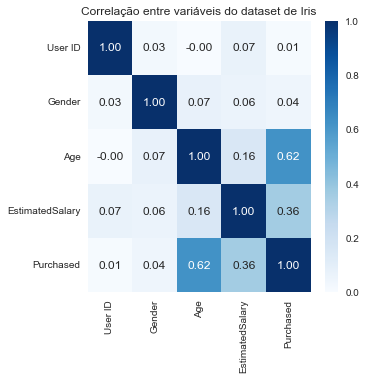

In [105]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(),   #.corr() traz a correlação de Pearson, mostrando um relacionamento linear entre as variáveis
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de Iris')
plt.show()

In [106]:
df.drop(['User ID','Gender'],axis=1,inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [107]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

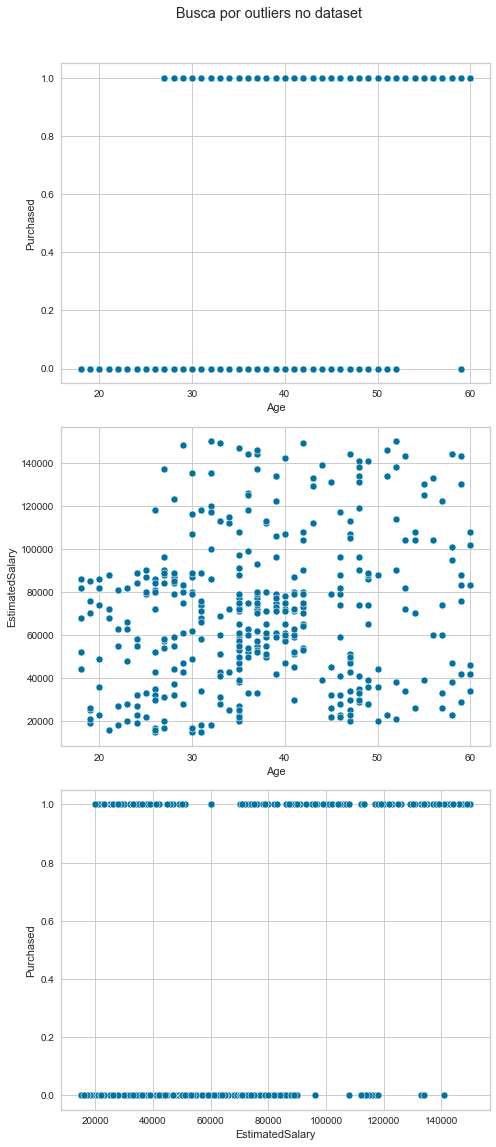

In [108]:
fig, axes = plt.subplots(3, 1,figsize=(7,16))

fig.suptitle('Busca por outliers no dataset',va="bottom")
fig.tight_layout(pad=2.0)

sns.scatterplot(ax=axes[0],data=df, x="Age",y='Purchased')
sns.scatterplot(ax=axes[1],data=df, x="Age",y='EstimatedSalary')
sns.scatterplot(ax=axes[2],data=df, x="EstimatedSalary",y='Purchased')

2.	Implementar ao menos um modelo de aprendizado supervisionado 

## Criação de Modelos de Machine Learning e Análise dos Resultados iniciais

In [109]:
model = GaussianNB()
model2 = KNeighborsClassifier(n_neighbors=5)

In [110]:
X = df.iloc[:,0:2]
y = df['Purchased']
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [111]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.925

In [112]:
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8166666666666667

In [113]:
y_pred = model.predict(X_test)
print('Classificador:', y_pred[1])
print('Valor Real:', y_test.iloc[1])

Classificador: 1
Valor Real: 1


In [114]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        73
           1       0.97      0.83      0.90        47

    accuracy                           0.93       120
   macro avg       0.94      0.91      0.92       120
weighted avg       0.93      0.93      0.92       120



## Uso experimental do Pycaret para comparar modelos existentes de forma automatizada e encontrar a melhor solução que se adequa ao problema

In [115]:
s = setup(df, target = 'Purchased')

,Description,Value
0,session_id,5547
1,Target,Purchased
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(400, 3)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [116]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9102,0.9706,0.8878,0.8726,0.8769,0.8066,0.8103,0.0040
gbc,Gradient Boosting Classifier,0.9029,0.9566,0.8567,0.8794,0.8626,0.7880,0.7945,0.0120
lightgbm,Light Gradient Boosting Machine,0.9028,0.9632,0.8556,0.8774,0.8596,0.7858,0.7935,0.0080
nb,Naive Bayes,0.8960,0.9606,0.8289,0.8818,0.8480,0.7698,0.7770,0.0030
ada,Ada Boost Classifier,0.8959,0.9434,0.8278,0.8860,0.8496,0.7708,0.7781,0.0160
rf,Random Forest Classifier,0.8958,0.9577,0.8667,0.8524,0.8547,0.7738,0.7798,0.0410
et,Extra Trees Classifier,0.8852,0.9289,0.8578,0.8390,0.8425,0.7529,0.7603,0.0380
dt,Decision Tree Classifier,0.8706,0.8575,0.7956,0.8395,0.8106,0.7131,0.7207,0.0030
lda,Linear Discriminant Analysis,0.8567,0.9388,0.7289,0.8639,0.7792,0.6758,0.6903,0.0030
ridge,Ridge Classifier,0.8532,0.0000,0.7189,0.8617,0.7729,0.6672,0.6818,0.0020


In [117]:
evaluate_model(best)

,Parameters
priors,None
reg_param,0.0
store_covariance,False
tol,0.0001


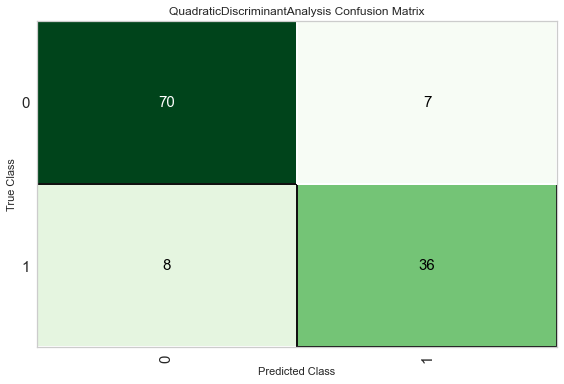

In [118]:
plot_model(best, plot = 'confusion_matrix')

In [119]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.8760,0.9277,0.8182,0.8372,0.8276,0.7308,0.7309


,Age,EstimatedSalary,Purchased,Label,Score
0,36.0,75000.0,0,0,0.8871
1,49.0,39000.0,1,1,0.8105
2,54.0,108000.0,1,1,0.9294
3,37.0,71000.0,0,0,0.8790
4,24.0,27000.0,0,0,0.9993
...,...,...,...,...,...
116,59.0,42000.0,0,1,0.9915
117,30.0,62000.0,0,0,0.9843
118,27.0,17000.0,0,0,0.9983
119,30.0,15000.0,0,0,0.9945


In [120]:
predictions = predict_model(best, data=df, raw_score=True)
predictions.head()

,Age,EstimatedSalary,Purchased,Label,Score_0,Score_1
0,19,19000,0,0,0.9999,0.0001
1,35,20000,0,0,0.9633,0.0367
2,26,43000,0,0,0.9978,0.0022
3,27,57000,0,0,0.9945,0.0055
4,19,76000,0,0,0.9970,0.0030


In [121]:
print("Score Naive Bayers manual:",model.score(X_test, y_test))
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Score Naive Bayers manual: 0.925
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        73
           1       0.97      0.83      0.90        47

    accuracy                           0.93       120
   macro avg       0.94      0.91      0.92       120
weighted avg       0.93      0.93      0.92       120



In [122]:
print("Score do Pycaret - melhor modelo encontrado:",best.score(X_test, y_test))
y_pred = best.predict(X_test)
print(classification_report(y_test, y_pred))

Score do Pycaret - melhor modelo encontrado: 0.9416666666666667
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        73
           1       0.95      0.89      0.92        47

    accuracy                           0.94       120
   macro avg       0.94      0.93      0.94       120
weighted avg       0.94      0.94      0.94       120



In [123]:
y_pred = best.predict(X_test) #testando o modelo
print('Classificador:', y_pred[1])
print('Valor Real:', y_test.iloc[1])

Classificador: 1
Valor Real: 1


3.	Implementar ao menos uma técnica de validação do desempenho do modelo

## Validação Cruzada para verificar qual algoritmo se saiu melhor

In [124]:
scores = cross_val_score(model, X, y, cv=10) #variável com número de validações cv

print("Scores obitidos:",scores)
print("Média de Score:",scores.mean())

Scores obitidos: [0.825 0.775 0.95  0.975 1.    0.875 0.775 0.8   0.875 0.925]
Média de Score: 0.8775000000000001


In [125]:
scores = cross_val_score(best, X, y, cv=10) #variável com número de validações cv

print("Scores obitidos:",scores)
print("Média de Score:",scores.mean())

Scores obitidos: [0.925 0.775 0.9   0.975 1.    0.875 0.8   0.8   0.875 0.95 ]
Média de Score: 0.8875


4.	Realizar análise do desempenho do modelo escolhido. Exemplos: indicar se foi necessário realizar algum pré-processamento nos dados, comentar sobre os hiperparâmetros usados, explicar os resultados e a técnica de validação utilizada, entre outras.

## Análise do projeto
> Para a etapa de exploração e pré-processamento, fiz uma verificação inicial dos possíveis problemas: Valores nulos em algum lugar do DataFrame, dados não normalizados, dados uplicados, Variáveis categóricas, correlação baixa entre os dados e outliers.

> Destes problemas, encontrei que havia a coluna de Gênero como categórica, então converti Masculino pra 1 e Feminino para 0. Após isso, percebi que a correção das variáveis Id_User e Gênero eram muito baixas com o resto dos dados(perto de 0), então fiz o drop destas 2 colunas dentro do DataFrame, o resto dos possíveis problemas mencionados acima foram analisados, porém não foi indetificado nada que poderia impactar no desempenho do algoritmo preditivo.

> Partindo para os algoritmos de aprendizado, fiz um teste inicial com a Regressão Linear, que se mostrou insuficiente pra minha surpresa, pois eu achava que era um problema deste tipo, fui conferir se o algoritmo de classificação se saía melhor e teve um desempenho muito acima do esperado, tive então a ideia de perguntar pra Jane o motivo de ser um problema de Classificação, pois eu ainda estava com essa dúvida de qual escolher depois de ler o material na noite passada. Sabendo agora que o problema era de classificação, explorei os modelos KNN e Naive Bayer, sem uso de hiperparâmetros neles, definido o número de K-vizinhos como 5 também. O algoritmo Naive Bayer teve um score de 0.925, enquanto o KNN 0.816. Depois, fiz a predição com o Naive Bayer para ver se ele de fato estava acertando pelo menos algo e confirmei que estava.

> Em estudos passados sobre Machine Learning, mais especificamente em uma maratona feita pela IBM no ano passado, a Behind the Code, vi que alguns competidores estavam usando uma biblioteca chamada PyCaret e fui atrás da documentação dela pra implementar aqui. Se trata de uma biblioteca que automatiza testes com diversos modelos e encontra o melhor com seus hiperparâmetros já definidos em pouco tempo(Para este dataset, questão de 10seg mais ou menos), meu objetivo aqui no caso seria tentar subir ainda mais o score, utilizando outros algoritmos. De todos os analisados pela biblioteca, foi retornado o Quadratic Discriminant Analysis como sendo o de maior score, plotei sua Matriz de confusão e o Report de Classificação para ver se não estava dando nenhum caso de Overfitting e aparentemente ficou estável, tendo um score final de 0.941.

> Por fim, adotei o método de validação cruzada visto em aula, usando 10 iterações para ser um pouco mais rigoroso com os dados e comparando tanto o Naive Bayers que fiz sua implementação manualmente quanto a sugestão do PyCaret, onde foi obtido o resultado de que realmente o algoritmo do PyCaret é ligeiramente mais eficiente nos resultados, tendo uma média de Score em 0.8875, enquanto o Naive Bayers teve 0.8775, exatamente 1% a menos de média.

